## 정리노트 #7

In [1]:
import numpy as np
np.random.seed(0) # 시드값 고정
x = np.random.rand(100,1)
y = 5 + 2 * x + np.random.rand(100,1)

x로부터 실숫값 y를 예측하는 것을 **회귀**라고 한다. 그리고 회귀 모델 중 예측값이 선형(직선)을 이루는 것을 **선형 회귀**라고 한다. 선형 회귀는 손실 함수로 평균 제곱 오차를 이용한다. 

In [2]:
import os
import sys
current_dir = os.getcwd()
sys.path.append(current_dir)
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

# 토이 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x, y = Variable(x), Variable(y) # 생략 가능

W = Variable(np.zeros((1, 1)))
b = Variable(np.zeros(1))


def predict(x):
    y = F.matmul(x, W) + b
    return y

variable([[0.64433458]]) variable([1.29473389]) variable(42.296340129442335)
variable([[1.12672345]]) variable([2.26959351]) variable(23.97380754378544)
variable([[1.48734571]]) variable([3.00386712]) variable(13.609686745040522)
variable([[1.75641886]]) variable([3.557186]) variable(7.747049961219976)
variable([[1.95666851]]) variable([3.97439789]) variable(4.43057410592155)
variable([[2.10518573]]) variable([4.28923203]) variable(2.5542803813535926)
variable([[2.21482401]]) variable([4.52705574]) variable(1.4925998690471942)
variable([[2.29524981]]) variable([4.70694745]) variable(0.8916952181756932)
variable([[2.35373273]]) variable([4.84325585]) variable(0.5514270962227453)
variable([[2.39573972]]) variable([4.9467725]) variable(0.35859153083192785)
variable([[2.425382]]) variable([5.02561369]) variable(0.2491573197756112)
variable([[2.44575118]]) variable([5.08588371]) variable(0.18690658765397886)
variable([[2.45917205]]) variable([5.13217364]) variable(0.15135336296314875)
varia

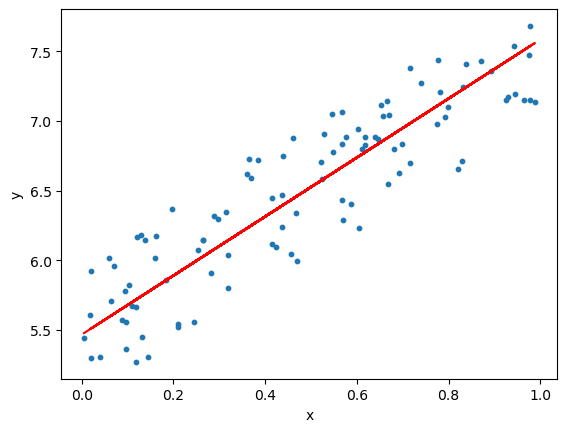

In [3]:
# 평균 제곱 오차 
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return F.sum(diff ** 2) / len(diff)

# 경사 하강법을 사용하여 100회 반복으로 훈련을 수행
lr = 0.1
iters = 100

# 각 반복에서 손실을 계산하고, 역전파를 수행하여 그라디언트를 얻은 다음, 학습률을 사용하여 가중치와 편향을 업데이트
for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    W.cleargrad()
    b.cleargrad()
    loss.backward()

    W.data -= lr * W.grad.data # 매개변수를 갱신할 때 인스턴수 변수의 data에 대해 계산해야 함
    b.data -= lr * b.grad.data
    print(W, b, loss)


# 그래프
plt.scatter(x.data, y.data, s=10)
plt.xlabel('x')
plt.ylabel('y')
y_pred = predict(x)
plt.plot(x.data, y_pred.data, color='r')
plt.show()

### 신경망

$y = F.matmul(x,W) + b$<br>
입력 x와 매개변수 W 사이에서 행렬 곱을 구하고, 거기에 b를 더하는 것을 **선형 변환** 또는 **아핀 변환**이라고 한다.<br>
선형 변환은 신경망에서 **완전연결계층**에 해당하며, 매개변수 **W**는 **가중치**, 매개변수 **b**는 **편향**이라고 한다.

In [4]:
def linear_simple(x, W, b=None):
    t = matmul(x, W)
    if b is None:
        return t

    y = t + b
    t.data = None # t의 데이터는 역전파 시 필요치 않으므로 메모리에서 삭제
    return y

비선형 데이터셋은 선형 회귀로는 풀 수가 없고, 신경망으로 해결해야 한다.

In [5]:
# 비선형 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

신경망은 선형 변환의 출력에 비선형 변환을 수행하는데, 이 비선형 변환을 **활성화 함수**라고 하며 대표적으로 **ReLU 함수**와 **시그모이드** 함수가 있다.

In [6]:
# 시그모이드 함수

def sigmoid_simple(x):
    x = as_variable(x)
    y = 1 / (1 + exp(-x))
    return y

신경망은 일반적으로 선형 변환과 활성화 함수를 순서대로 적용하는데, 이것이 신경망 추론 코드이다. 이 추론을 제대로 하려면 학습이 필요하고, 신경망 학습에서는 추론을 처리한 후 손실 함수를 추가하고, 손실 함수의 출력을 최소화하는 매개변수를 찾는다.

In [7]:
# 신경망 학습 코드

# 데이터셋
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# 가중치 초기화
I, H, O = 1, 10, 1  # I, H, O는 입력층, 은닉층, 출력층의 노드 수
# 첫 번째 및 두 번째 선형 계층의 가중치와 편향을 나타내는 변수
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

# 신경망 추론
# 입력 x를 첫 번째 선형 계층을 통해 처리하고, 활성화 함수(시그모이드)를 적용한 후 두 번째 선형 계층으로 전달
def predict(x):
    y = F.linear(x, W1, b1)
    y = F.sigmoid(y)
    y = F.linear(y, W2, b2)
    return y


lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x) # 각 반복에서 예측값을 계산하고, 실제값과의 평균 제곱 오차를 구함
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 1000 == 0: # 각 반복(iteration)의 인덱스 i가 1000의 배수일 때마다, 즉 0, 1000, 2000, ..., 9000번째 반복에서 손실 값을 출력
        print(loss)

variable(0.8473695850105871)
variable(0.2514286285183606)
variable(0.2475948546674987)
variable(0.23786120447054812)
variable(0.21222231333102912)
variable(0.16742181117834118)
variable(0.09681932619992623)
variable(0.07849528290602323)
variable(0.07749729552991155)
variable(0.07722132399559312)


### 매개변수를 모아두는 계층

매개변수는 경사하강법 등의 최적화 기법에 의해 갱신되는 변수이다. 예를 들어 선형 변환에 사용되는 **가중치**와 **편향**이 매개변수에 해당한다.

Parameter 클래스는 Variable 클래스와 똑같은 기능을 갖게 한다.
```python
class Parameter(Variable):
    pass
```

layer 클래스는 기반 클래스로 두고 구체적인 변환은 자식 클래스에서 구현한다.
```python
class Layer:
    def __init__(self):
        self._params = set() # _params라는 인스턴스 변스에 Layer 인스턴스에 속한 매개변수를 보관한다.

    def __setattr__(self, name, value): # 인스턴스 변수를 설정할 때 호출되는 특수 메서드
        if isinstance(value, Parameter: #  value가 Parameter 인스턴스인지 확인
            self._params.add(name)
        super().__setattr__(name, value) # 실제 속성 설정은 상위 클래스의 __setattr__ 메서드를 통해 처리되도록 함
                      
    def __call__(self, *inputs): 
        outputs = self.forward(*inputs)
        if not isinstance(outputs, tuple):
            outputs = (outputs,)
        self.inputs = [weakref.ref(x) for x in inputs]
        self.outputs = [weakref.ref(y) for y in outputs]
        return outputs if len(outputs) > 1 else outputs[0]

    def forward(self, inputs):
        raise NotImplementedError()

    def params(self): 
        for name in self._params:  # _params 집합에 포함된 각 이름에 대해 해당 객체를 가져옴
            obj = self.__dict__[name]

            if isinstance(obj, Layer): # 만약 이 객체가 다른 Layer 객체라면 재귀적으로 그 레이어의 params 메서드를 호출
                yield from obj.params()
            else:
                yield obj # 그렇지 않으면 파라미터 객체를 반환

    def cleargrads(self):
        for param in self.params():
            param.cleargrad()
```

개선된 버전의 Linear 클래스 구현
```python
class Linear(Layer):
    def __init__(self, out_size, nobias=False, dtype=np.float32, in_size=None):
        super().__init__()
        self.in_size = in_size
        self.out_size = out_size
        self.dtype = dtype

        self.W = Parameter(None, name='W')
        if self.in_size is not None:
            self._init_W()

        if nobias:
            self.b = None
        else:
            self.b = Parameter(np.zeros(out_size, dtype=dtype), name='b')

    def _init_W(self, xp=np):
        I, O = self.in_size, self.out_size
        # 가중치는 정규 분포에서 샘플링한 후, np.sqrt(1 / I)로 스케일링하여 초기화
        W_data = xp.random.randn(I, O).astype(self.dtype) * np.sqrt(1 / I)
        self.W.data = W_data

    def forward(self, x):
        # 데이터를 흘려보내는 시점에 가중치 초기화
        if self.W.data is None:
            self.in_size = x.shape[1]
            self._init_W()

        y = F.linear(x, self.W, self.b)
        return y
```

In [8]:
import numpy as np
import dezero.functions as F
import dezero.layers as L


np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

l1 = L.Linear(10) # 출력 크기 지정
l2 = L.Linear(1) 


def predict(x):
    y = l1(x)
    y = F.sigmoid(y)
    y = l2(y)
    return y


lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    l1.cleargrads()
    l2.cleargrads()
    loss.backward()

    for l in [l1, l2]: #  두 개의 레이어 l1과 l2에 대한 파라미터를 업데이트
        for p in l.params(): 
            # 기울기의 방향으로 파라미터 값을 조정하여 손실 함수를 최소화
            p.data -= lr * p.grad.data # p.data는 파라미터의 현재 값이며, p.grad.data는 해당 파라미터의 기울기
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.23721590814318072)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355153)
variable(0.07655073683421634)
variable(0.07637803086238225)
variable(0.0761876413118557)


위 코드에서 매개변수 관리를 Linear 인스턴스가 맡고 있다는 점이 중요하다. 

현재 Layer 클래스는 여러 개의 Parameter를 가질 수 있다. 여기에 더해 Layer 클래스가 **다른 Layer**도 담을 수 있게 확장한다.<br>
```python
class Layer:
    def __init__(self):
        self._params = set()

    def __setattr__(self, name, value):
        if isinstance(value, (Parameter, Layer)): # Layer도 추가
            self._params.add(name)
        super().__setattr__(name, value)

    def params(self):
        for name in self._params:
            obj = self.__dict__[name]

            if isinstance(obj, Layer): # Layer에서 매개변수 꺼내기
                yield from obj.params()
            else:
                yield obj
```

yield를 사용한 함수를 제너레이터라고 한다. 제너레이터를 사용하여 또 다른 제너레이터를 만들고자 할 때는 yield from을 사용한다. 
제너레이터는 일반적인 함수와 달리, 함수의 실행을 일시 중지하고 값을 반환(yield)할 수 있으며, 다음 번 호출 시에 일시 중지된 부분부터 실행을 재개한다.

```python
# Layer 클래스를 더 편리하게 사용하기 위해 Layer 클래스를 상속하여 모델 전체를 하나의 클래스로 정의할 수 있다.

class TwoLayerNet(Layer):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)
    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y
```

복잡한 패턴이나 규칙이 숨어 있는 현상을 수식을 사용하여 단순하게 표현한 것을 **모델**이라고 한다.

```python
from dezero import Layer
from dezero import utils


class Model(Layer):
    def plot(self, *inputs, to_file='model.png'): 
        y = self.forward(*inputs)
        return utils.plot_dot_graph(y, verbose=True, to_file=to_file)
```

In [10]:
import os
import sys
current_dir = os.getcwd()
sys.path.append(current_dir)
import numpy as np
from dezero import Model
import dezero.layers as L
import dezero.functions as F

# 데이터셋 생성
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

# 하이퍼파라미터 설정
lr = 0.2 # 학습률
max_iter = 10000 # 훈련을 위한 반복 횟수
hidden_size = 10  # 은닉층의 뉴런 수

# 모델 정의 
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size) # hidden_size는 첫 번째 (은닉) 레이어의 뉴런 수를 나타냄
        self.l2 = L.Linear(out_size) # out_size는 두 번째 레이어(출력 레이어)의 뉴런 수를 나타냄

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y


model = TwoLayerNet(hidden_size, 1)

# 학습 시작
for i in range(max_iter):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    for p in model.params():
        p.data -= lr * p.grad.data
    if i % 1000 == 0:
        print(loss)

variable(0.8165178492839196)
variable(0.24990280802148895)
variable(0.24609876581126014)
variable(0.23721590814318072)
variable(0.20793216413350174)
variable(0.12311905720649353)
variable(0.07888166506355153)
variable(0.07655073683421634)
variable(0.07637803086238225)
variable(0.0761876413118557)


```python
# 완전연결계층 신경망 구현
class MLP(Model):
    def __init__(self, fc_output_sizes, activation=F.sigmoid):
        super().__init__()
        self.activation = activation
        self.layers = []

        for i, out_size in enumerate(fc_output_sizes):
            layer = L.Linear(out_size)
            setattr(self, 'l' + str(i), layer)
            self.layers.append(layer)

    def forward(self, x):
        for l in self.layers[:-1]:
            x = self.activation(l(x))
        return self.layers[-1](x)
```